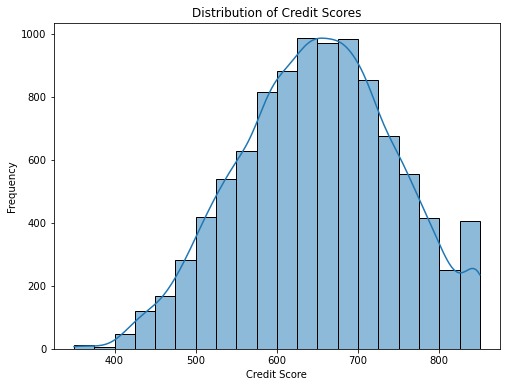

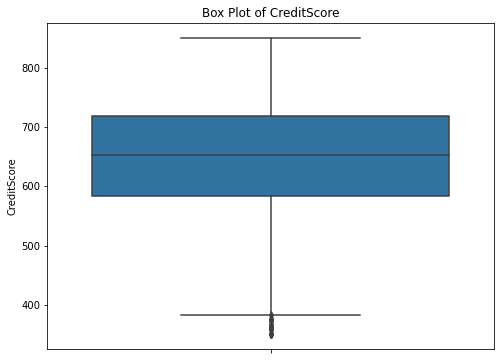

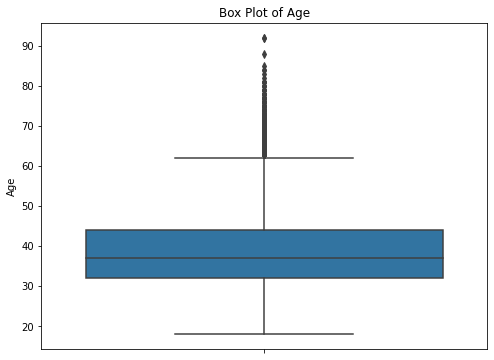

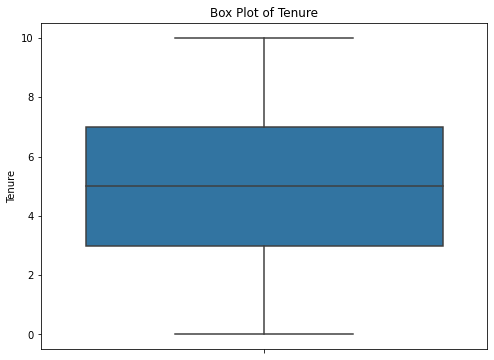

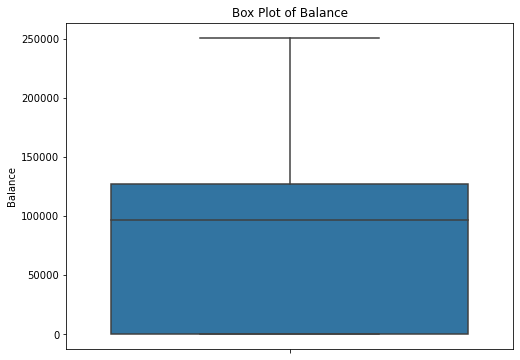

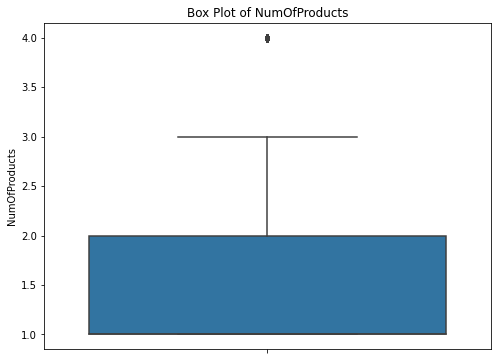

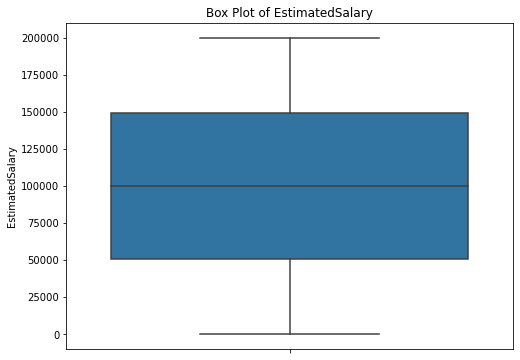

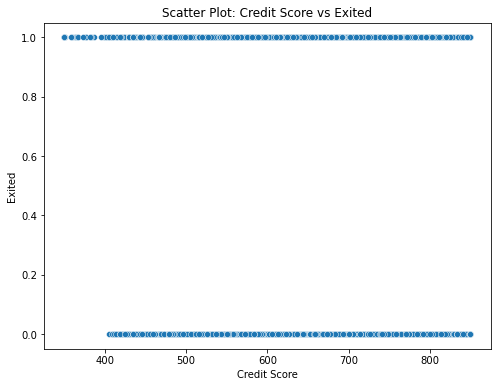

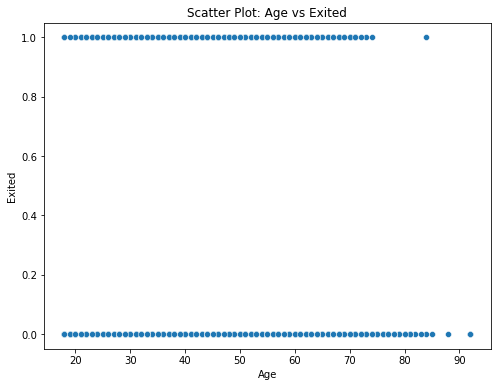

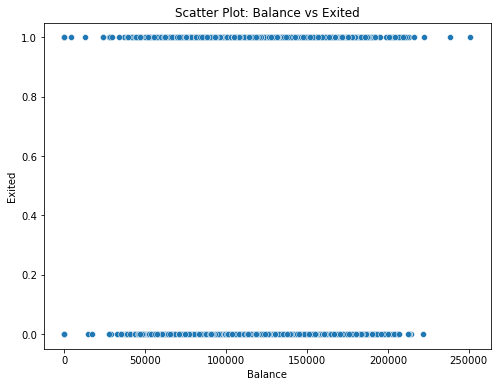

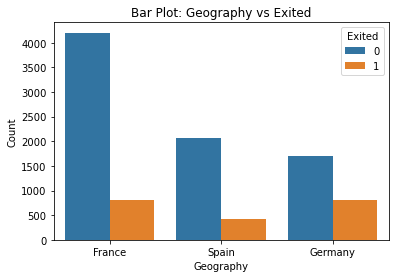

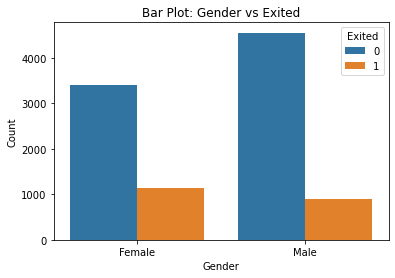

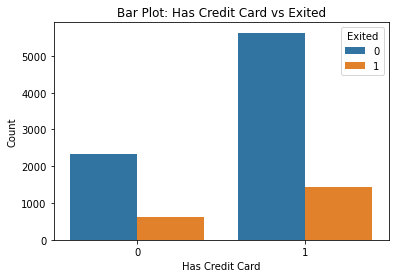

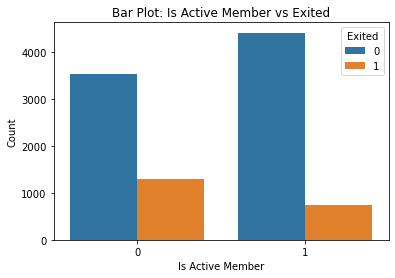

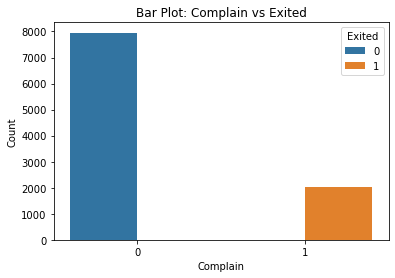

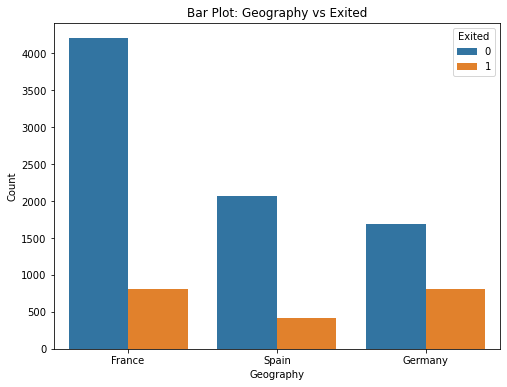

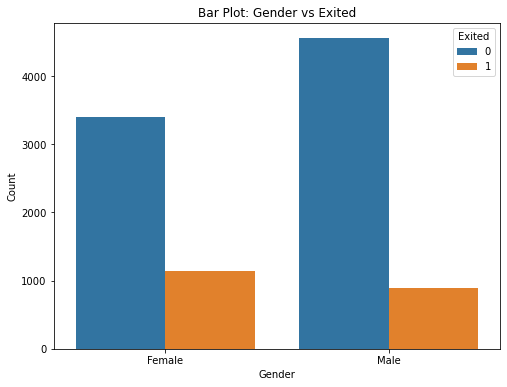

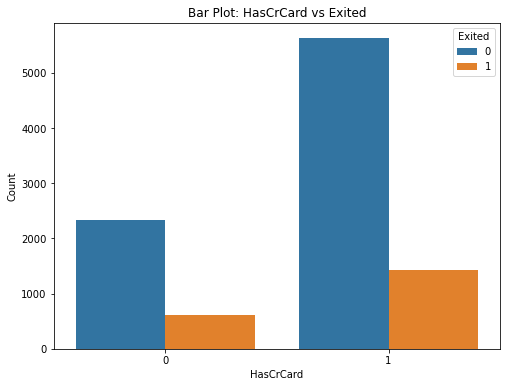

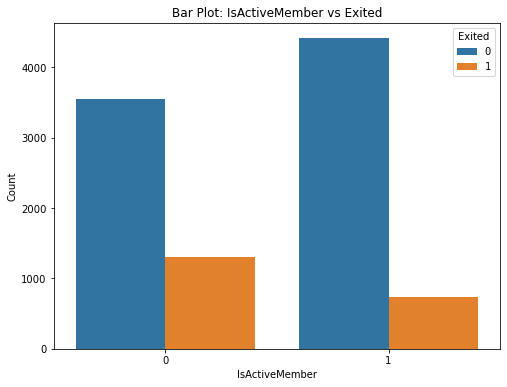

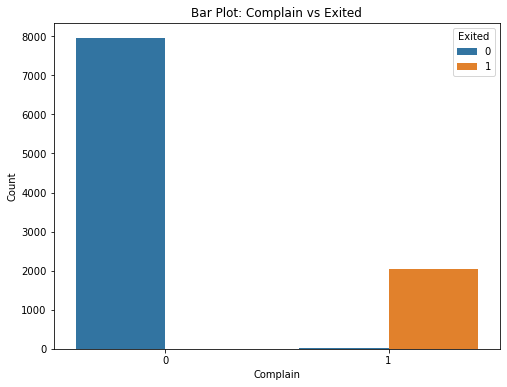

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report, precision_recall_curve, average_precision_score
import xgboost as xgb
from xgboost import XGBClassifier


# Load the dataset
df = pd.read_csv("customer att.csv")

# Drop columns
df.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)


import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram of CreditScore
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='CreditScore', bins=20, kde=True)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Scores')
plt.show()
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


# Plot box plots for numerical variables
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()
# Scatter plot for creditscore vs exited
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of CreditScore vs Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CreditScore', y='Exited')
plt.xlabel('Credit Score')
plt.ylabel('Exited')
plt.title('Scatter Plot: Credit Score vs Exited')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Age vs Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Exited')
plt.xlabel('Age')
plt.ylabel('Exited')
plt.title('Scatter Plot: Age vs Exited')
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Balance vs Exited
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Balance', y='Exited')
plt.xlabel('Balance')
plt.ylabel('Exited')
plt.title('Scatter Plot: Balance vs Exited')
plt.show()



# Bar plot for Geograhy vs exited
import seaborn as sns
sns.countplot(x='Geography', hue='Exited', data=df)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Bar Plot: Geography vs Exited')
plt.show()

# bar plot for gender vs exited
import seaborn as sns

sns.countplot(x='Gender', hue='Exited', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Bar Plot: Gender vs Exited')
plt.show()

# bar plot for has creditcard vs exited
import seaborn as sns

sns.countplot(x='HasCrCard', hue='Exited', data=df)
plt.xlabel('Has Credit Card')
plt.ylabel('Count')
plt.title('Bar Plot: Has Credit Card vs Exited')
plt.show()

# bar plot for is active member vs exited
import seaborn as sns

sns.countplot(x='IsActiveMember', hue='Exited', data=df)
plt.xlabel('Is Active Member')
plt.ylabel('Count')
plt.title('Bar Plot: Is Active Member vs Exited')
plt.show()

# bar plot for complain vs exited
import seaborn as sns

sns.countplot(x='Complain', hue='Exited', data=df)
plt.xlabel('Complain')
plt.ylabel('Count')
plt.title('Bar Plot: Complain vs Exited')
plt.show()

# Define categorical columns
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain']

# Plot count plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar Plot: {col} vs Exited')
    plt.show()

# Encode categorical variables
df = pd.get_dummies(df, columns=["Geography", "Gender", "Card Type"], drop_first=True)



In [27]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
problematic_rows = df[df.eq("P'an").any(1)]
problematic_columns = df.columns[df.eq("P'an").any()]
print(problematic_rows)
print(problematic_columns)

# Drop the 'Surname' column from the feature set
X_train = X_train.drop('Surname', axis=1)
X_test = X_test.drop('Surname', axis=1)



     Surname  CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
676     P'an          593   38       4   88736.44              2          1   
1560    P'an          720   43      10  110822.90              1          0   
1973    P'an          693   41       4       0.00              2          0   
2922    P'an          685   34       6   83264.28              1          0   
5308    P'an          449   31       1  113693.00              1          0   
5408    P'an          682   54       0   83102.72              2          1   
5716    P'an          611   37       1  117524.72              2          0   
9254    P'an          686   32       6       0.00              2          1   

      IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  \
676                0         67020.03       0         0                   5   
1560               0         72861.94       0         0                   4   
1973               0        156381.47       0      

Cross-validation scores: [0.791875 0.780625 0.7925   0.776875 0.79    ]
Average cross-validation score: 0.786375


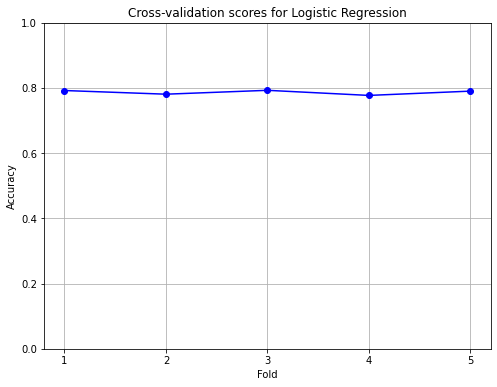

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.43      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000



In [46]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
logreg = LogisticRegression()

# Perform cross-validation
scores = cross_val_score(logreg, X_train, y_train, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation scores for Logistic Regression')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.grid(True)
plt.show()

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))




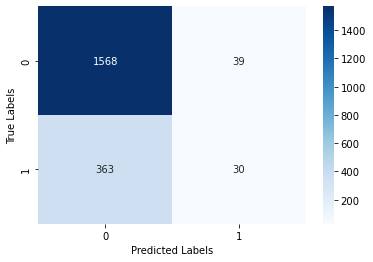

In [36]:
# calculate and plot the confusion metrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



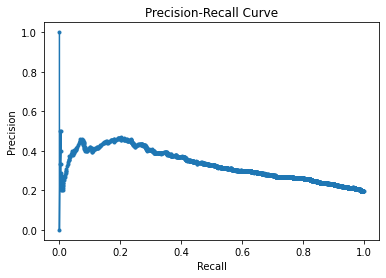

Average Precision Score: 0.33239947111801815


In [35]:
# calculate and plot the precision recall cureve and average precision score
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

probs = logreg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)
average_precision = average_precision_score(y_test, probs)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

print('Average Precision Score:', average_precision)


Cross-validation scores: [0.99875  0.998125 0.999375 0.9975   0.99875 ]
Average cross-validation score: 0.9985000000000002


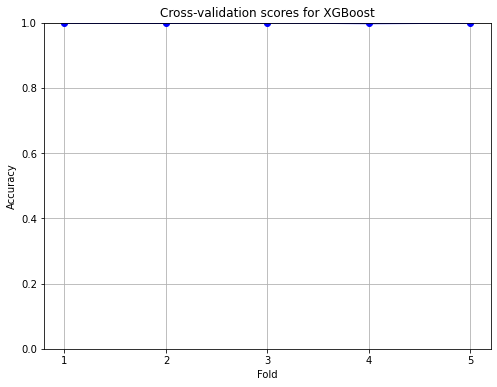

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [47]:
# predictions using xgboost algorithum
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Create the XGBoost model
model = xgb.XGBClassifier()

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 means 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation scores for XGBoost')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.grid(True)
plt.show()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))



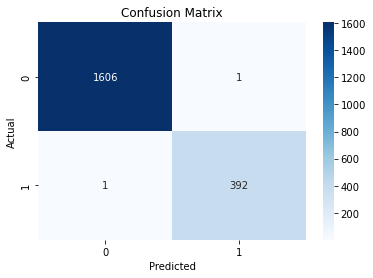

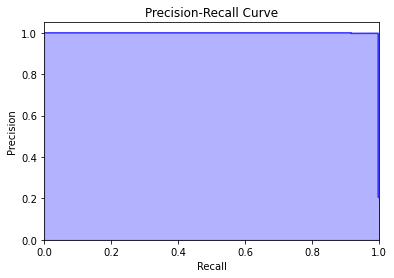

Average Precision Score: 0.9977640302191803


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Calculate average precision score
average_precision = average_precision_score(y_test, y_pred_prob)

# Plot precision-recall curve
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Print average precision score
print("Average Precision Score:", average_precision)



Cross-validation scores: [0.99875  0.996875 0.998125 0.995625 0.995625]
Average cross-validation score: 0.9969999999999999


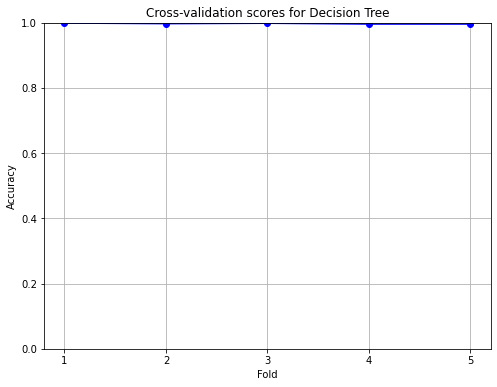

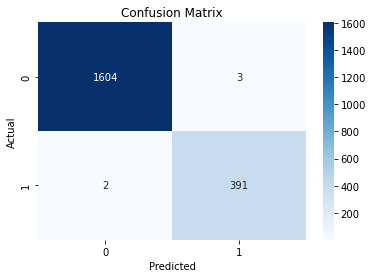

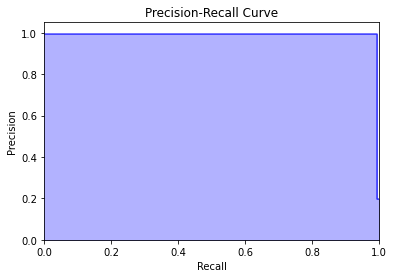

Average Precision Score: 0.9883354774544374
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99      0.99       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [48]:
# prediction using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier()

# Perform cross-validation
scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

# Plot the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), scores, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validation scores for Decision Tree')
plt.xticks(np.arange(1, 6))
plt.ylim([0, 1])
plt.grid(True)
plt.show()


# Train the decision tree model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot the precision-recall curve
y_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)
plt.step(recall, precision, color='b', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()

# Print the average precision score
print("Average Precision Score:", average_precision)

# Print the classification report
print(classification_report(y_test, y_pred))



Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.43      0.08      0.13       393

    accuracy                           0.80      2000
   macro avg       0.62      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

--------------------------------------------
Classification Report - XGBoost
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

--------------------------------------------
Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       0.99      0.99

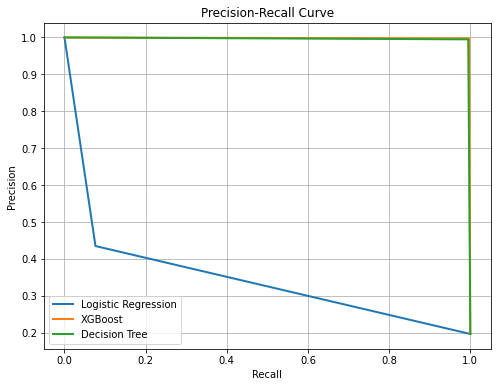

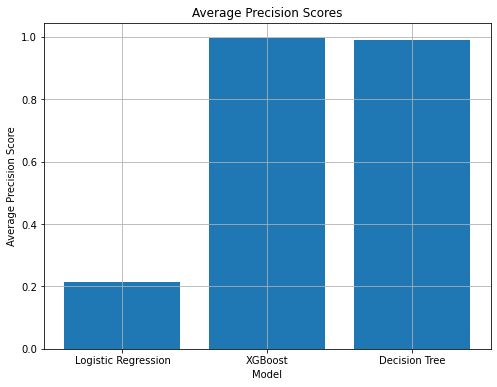

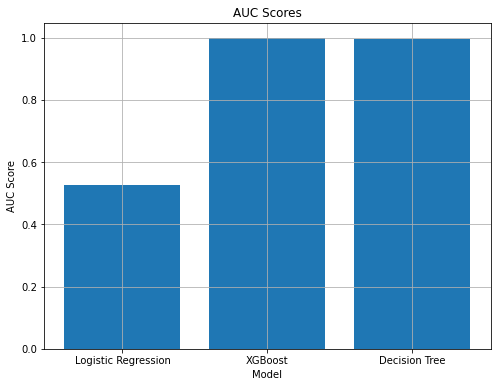

In [42]:
# comparison
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

# Create the models
logreg = LogisticRegression()
xgb = XGBClassifier()
dt = DecisionTreeClassifier()

models = [logreg, xgb, dt]
model_names = ['Logistic Regression', 'XGBoost', 'Decision Tree']

# Lists to store the metrics
precision_scores = []
recall_scores = []
average_precision_scores = []
auc_scores = []

# Iterate over the models
for model, name in zip(models, model_names):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate precision-recall curve and average precision score
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    
    # Calculate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    
    # Append scores to lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    average_precision_scores.append(average_precision)
    auc_scores.append(auc_score)
    
    # Print classification report
    print(f"Classification Report - {name}")
    print(classification_report(y_test, y_pred))
    print("--------------------------------------------")
    
# Plot precision-recall curves
plt.figure(figsize=(8, 6))
for precision, recall, name in zip(precision_scores, recall_scores, model_names):
    plt.plot(recall, precision, lw=2, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Plot average precision scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, average_precision_scores)
plt.xlabel('Model')
plt.ylabel('Average Precision Score')
plt.title('Average Precision Scores')
plt.grid(True)
plt.show()

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, auc_scores)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores')
plt.grid(True)
plt.show()
